In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
from scipy.stats import norm
import random
import seaborn
from scipy.stats import uniform
from scipy.optimize import differential_evolution

from numpy.random import choice
from scipy.stats import *

### Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [34]:
raitings = [[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
            [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
            [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
            [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
            [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
            [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
            [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
            [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
            [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
            [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]]

<b> a) </b> Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [35]:
def cosine(a, b):
#Подсчет косинуса угла между векторами по их координатам

    # длины векторов
    aLength = np.linalg.norm( a )
    bLength = np.linalg.norm( b )
    
    return np.dot(a, b) / (aLength * bLength)

In [36]:
for i in range (len(raitings)):   

    # подсчет косинусного расстояния между пользователем и остальными --> получим список из 10 элементов:
    dist = [cosine (raitings[i],raitings[j]) for j in range (len(raitings))]
  

    # из списка создаем кортежи из порядкового номера элемента + 1 и самого элемента:
    d = list(enumerate(dist, 1))

    # сортировка списка по убыванию элементов
    d.sort (key = lambda i: i[1], reverse = True)
   

    # создание пар вида (пользователь, наиболее похожий на него пользователь) - нумерация с 1
    user_pair = i+1, d[1][0]
    print (user_pair)          


(1, 9)
(2, 5)
(3, 10)
(4, 10)
(5, 9)
(6, 10)
(7, 4)
(8, 6)
(9, 1)
(10, 3)


<b> b) </b>Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [37]:
# исходная матрица рейтингов фильмов
R = np.array (raitings) 

# Сингулярное разложение
U, s, VT = np.linalg.svd(R)

# нулевая матрица m x n
S = np.zeros((R.shape[0], R.shape[1]))

# матрица n x n на диагональ S
S[:S.shape[0], :S.shape[0]] = np.diag(s)

n_component = 5
S = S[:, :n_component]
VT = VT[:n_component, :]

#B = U.dot(S.dot(VT))

# сжатие до 5 признаков
T = U.dot(S)

print(T) 

[[-23.41982063   5.36092136   3.83196779  -4.06950174   1.10267269]
 [-24.76774917  -4.52188701   1.35815965   1.58128545   8.59912002]
 [-22.27728589   6.96492049  -4.84461485  -0.47661647   3.37152266]
 [-19.4257757   -2.64575227  -6.86014009  -4.76604765   1.96075707]
 [-22.8146354   -0.51464093   7.70180188   4.42379773   1.29124163]
 [-21.76961656  -1.94294987  -4.56934779   8.32306487  -2.21887359]
 [-21.23427453  -9.78047778   1.16340271  -4.86074521  -2.60815471]
 [-19.97476815  -4.00048677  -1.67456316   1.1512346   -3.5637169 ]
 [-26.39306998   3.03090482   5.86422753  -1.67503491  -3.71500141]
 [-29.94016844   4.82012297  -3.48912415   0.05527083  -3.62526487]]


### Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать).

**Решение:**

$f(x) = tg^2(sin(x)+cos(2x+3))$


$f'(x) = 2tg(sin(x)+cos(2x+3))*tg'(sin(x)+cos(2x+3))*(sin(x)+cos(2x+3))' $

$f'(x) = \frac{2tg(sin(x)+cos(2x+3))}{(cos^2(sin(x)+cos(2x+3))}*(sin(x)'+cos(2x+3)'*2) $

$f'(x) = \frac{2tg(sin(x)+cos(2x+3))}{(cos^2(sin(x)+cos(2x+3))}*(cos(x)-2sin(2x+3)) $



In [38]:
from scipy.misc import derivative

def f(x):
    return (np.tan (np.sin(x) + np.cos (2*x + 3)))**2

print ('Значение производной в точке х0 = 1 составляет', derivative(f, 1.0, dx=1e-6, n=1))

Значение производной в точке х0 = 1 составляет 55.3859176464222


### Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку <b>error</b>

In [39]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [40]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
       1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
       2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
       3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [41]:
fx = np.array([0.        , -12.01819092, -18.90968634, -17.68786571,
        -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
        19.22059845,   9.48411207,  -3.22273056, -13.48576488,
       -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
        22.12489421,  24.20292139,  18.04522521,   6.33211092])

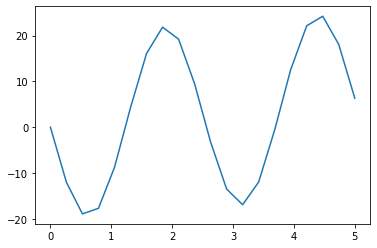

In [42]:
plt.plot(x, fx)
plt.show()

In [43]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [44]:
rr = ((-5,5,0.25), (-5,5,0.25))
res = brute (error, rr, full_output = True,finish=fmin)
res[0], res[1]

(array([ 3. , -2.5]), 1.5163282505170628e-06)

In [45]:
bounds = [(-5, 5), (-5, 5)]
result = differential_evolution(error, bounds, seed=50)
result

     fun: 1.5110387376893186e-06
     jac: array([141.43905975, 503.90950337])
 message: 'Optimization terminated successfully.'
    nfev: 1923
     nit: 61
 success: True
       x: array([ 3. , -2.5])

In [46]:
res = minimize(error, [ 3. , -2.5] , method='nelder-mead', options={'xtol': 1e-8, 'disp': True})
res.x

Optimization terminated successfully.
         Current function value: 0.000002
         Iterations: 51
         Function evaluations: 103


array([ 3. , -2.5])

**Ответ:**
параметры a и b, при которых error минимальна: a = 3; b = -2.5

### Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [56]:
rv = sts.poisson(12)
sample = rv.rvs(size=1000, random_state=20)

In [57]:
np.unique(sample)

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22])

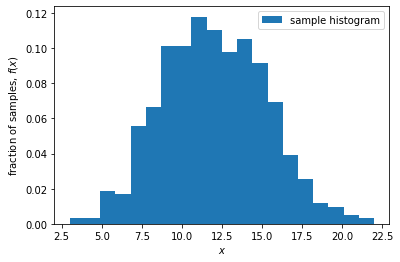

In [58]:
x = np.linspace(0,2,100)
plt.hist(sample, density=True, bins=20, label='sample histogram')
plt.legend()
plt.ylabel('fraction of samples, $f(x)$')
plt.xlabel('$x$')
plt.show()

In [59]:
# размер выборки
n = 50 
# количество выборок
samples_count = 1000

# средние
avg = np.array([])

for number in range (samples_count):
    # генерация выборок
    sample_ = rv.rvs(size=n)
    avg = np.append(avg, sample_.mean())


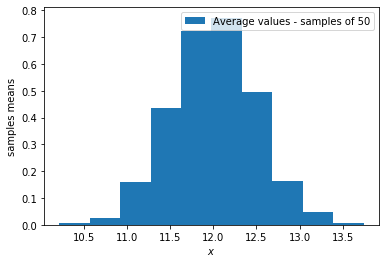

In [60]:
label_ = 'Average values - samples of ' + str(n) 
plt.hist(avg, density=True, label=label_)

plt.legend()
plt.ylabel('samples means')
plt.xlabel('$x$')
plt.show()

### Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[[1, -4],

 [1, 1]]

In [52]:
t = np.array([[1, -4],
              [1, 1]])
print(t)

[[ 1 -4]
 [ 1  1]]


Матрица $\begin{pmatrix}1 & -4\\ 1 & 1\end{pmatrix} $

Определитель матрицы   $\begin{vmatrix}1 - \lambda & -4\\ 1 & 1 - \lambda\end{vmatrix} = 0 $

$(1 - \lambda)^2+4 = 0$ 

$1 - 2\lambda + \lambda^2 +4 = 0 $ 

$\lambda^2- 2\lambda +5 = 0 $ 

$ D = 4 - 20 = -16 => $  характеристическое уравнение не имеет корней

In [53]:
val, vect = np.linalg.eig(t)
print('Собственные значения:')
print(val)
print('\nСобственные векторы:')
print(vect)

Собственные значения:
[1.+2.j 1.-2.j]

Собственные векторы:
[[0.89442719+0.j        0.89442719-0.j       ]
 [0.        -0.4472136j 0.        +0.4472136j]]


В данном случае собственные значения и векторы - комплексные числа.

Для матрицы

[[1, -4],

 [1, 1]]

In [54]:
t1 = np.array([[1, 4],
              [1, 1]])
print(t1)

[[1 4]
 [1 1]]


In [55]:
val1, vect1 = np.linalg.eig(t1)
print('Собственные значения:')
print(val1)
print('\nСобственные векторы:')
print(vect1)

Собственные значения:
[ 3. -1.]

Собственные векторы:
[[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]


Матрица $\begin{pmatrix}1 & 4\\ 1 & 1\end{pmatrix} $

Определитель матрицы   $\begin{vmatrix}1 - \lambda & 4\\ 1 & 1 - \lambda\end{vmatrix} = 0 $

$(1 - \lambda)^2-4 = 0$ 

$(1 - \lambda)^2 = 4$ 

$1 - \lambda = 2 ;  1 - \lambda = -2$ 

$\lambda_1 = -1 ; \lambda_2 = 3 $ 

$\begin{equation*}
 \begin{cases}
   2x + 4y = 0, 
   \\
   x + 2y = 0.
 \end{cases}
\end{equation*}\;\;\;$ 
$\Rightarrow\;$
$ x = -2y$

$\begin{pmatrix}2 \\ -1\end{pmatrix} $ - первый собственный вектор


$\begin{equation*}
 \begin{cases}
   -2x + 4y = 0, 
   \\
   x - 2y = 0.
 \end{cases}
\end{equation*}\;\;$
$\Rightarrow\;$
$ x = 2y$

$\begin{pmatrix}2 \\ 1\end{pmatrix} $ - второй собственный вектор


